# LOAD DATASETS 

In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning) # removes future warnings

In [3]:
import pandas as pd
import numpy as np

js=pd.read_csv(r"D:\future_skill_demand_predictor_project\job_skills.csv")
js.head() #displays the top 5 rows

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [4]:
js.tail() # displays the bottom 5 rows

,job_link,job_skills
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."
1296380,https://www.linkedin.com/jobs/view/conductor-e...,"Customer Service, Driving, Loading, Unloading,..."


In [5]:
lp=pd.read_csv(r"D:\future_skill_demand_predictor_project\linkedin_job_postings.csv")
lp.head() #displays the top 5 rows

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [6]:
lp.tail()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite
1348453,https://www.linkedin.com/jobs/view/on-demand-g...,2024-01-21 00:38:44.231492+00,t,t,f,"On-Demand: Guest Advocate (Cashier), General M...",Target,"Culver City, CA",2024-01-12,Malibu,United States,Cashier Ii,Mid senior,Onsite


# DATA PREPARATION - Exploring the datasets

In [7]:
 js.columns # columns in job_skills 

Index(['job_link', 'job_skills'], dtype='object')

In [8]:
lp.columns # columns in linkedin postings

Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type'],
      dtype='object')

In [9]:
js.describe() # as it is a textual data...it gives distribution info rather than statistical info

#count - Total number of non-empty skill entries
#unique - Number of distinct skill strings
#top - The most frequently occurring skill value
#freq - Number of times the top skill appears

,job_link,job_skills
count,1296381,1294296
unique,1296381,1287101
top,https://www.linkedin.com/jobs/view/housekeeper...,"Front Counter, DriveThru, Outside Order Taker,..."
freq,1,169


In [10]:
lp.describe()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348454,1348454,1348454,1348454,1348454,1348454,1348443,1348435,1348454,1348454,1348454,1348454,1348454,1348454
unique,1348454,722748,2,2,2,584544,90605,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625540,1297877,1296401,1346978,7325,41598,13436,460035,10052,1149342,19468,1204445,1337633


In [11]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


In [12]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB


In [13]:
js.shape

(1296381, 2)

In [14]:
lp.shape

(1348454, 14)

In [15]:
type(lp) #shows the dataset type

pandas.core.frame.DataFrame

In [16]:
type(lp["company"]) # series - a one-dimensional labeled array that represents a single column 

pandas.core.series.Series

In [17]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning) # removes future warnings

In [18]:
#set_index() - changes a column into an dataframe index for fast searching
#inplace=True - Modification happens on the same table directly. so that pandas no need to create a new table 
  #  the word "inplace" = name parameter "True" = Value . Together called as "Keyword Argument". 

In [19]:
lp.set_index("company",inplace=True)
lp.head()


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
company,,,,,,,,,,,,,
BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
"IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [20]:
# reset_index() - used to bring back the converted dataframe index to normal column   

In [21]:
lp.reset_index("company",inplace=True)
lp.head()

,company,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,"IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


# DATA CLEANING

In [22]:
js.isnull().sum() # gives the no. of null values in each column

job_link         0
job_skills    2085
dtype: int64

In [23]:
js.isnull().sum().sum() # gives the total no. of null values in the entire dataset

np.int64(2085)

In [24]:
lp.isnull().sum()

company                11
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64

In [25]:
lp.isnull().sum().sum()

np.int64(30)

In [26]:
missing_percent = js.isnull().mean() * 100
print(missing_percent)
# calculates the % of missing values in the dataframe for each column

job_link      0.000000
job_skills    0.160832
dtype: float64


In [27]:
missing_percent = lp.isnull().mean() * 100
print(missing_percent)

company                0.000816
job_link               0.000000
last_processed_time    0.000000
got_summary            0.000000
got_ner                0.000000
is_being_worked        0.000000
job_title              0.000000
job_location           0.001409
first_seen             0.000000
search_city            0.000000
search_country         0.000000
search_position        0.000000
job_level              0.000000
job_type               0.000000
dtype: float64


In [28]:
#  as the missing values in linked in postings are < 5% - can safely remove the values 
#  as the missing values in job skills dataset are < 30% but > 5% - replace the values with mode 
# for categorical columns - go for mode 
#  for numerical columns - go for mean

In [29]:
 # gives the number no null & non-null values
lp[["company","job_location"]].shape

(1348454, 2)

In [30]:
df=lp[lp.isnull().any(axis=1)] 
df
# axis = 1 - refers rows 0 - refers columns 
# any() - this func. checks if any value is true
#  jp[...] - used for dataframe filtering

,company,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
11788,NaN,https://uk.linkedin.com/jobs/view/nursery-room...,2024-01-19 09:45:09.215838+00,f,f,f,Nursery Room Manager,"Cobham, England, United Kingdom",2024-01-16,Crawley,United Kingdom,Sample-Room Supervisor,Mid senior,Onsite
118051,ENERJIA,https://fr.linkedin.com/jobs/view/superviseur-...,2024-01-19 19:18:09.404404+00,t,t,f,Superviseur de montage F/H en Allemagne,NaN,2024-01-17,Gloucester,United States,Supervisor Rides,Associate,Onsite
121181,Health eCareers,https://www.linkedin.com/jobs/view/med-surg-rn...,2024-01-19 19:33:22.370938+00,t,t,f,"Med Surg RN needed in Rochester, NY at Maxim H...",NaN,2024-01-14,Cooperstown,United States,Companion,Mid senior,Onsite
138655,CyberCoders,https://www.linkedin.com/jobs/view/family-law-...,2024-01-19 21:04:18.739916+00,t,t,f,"Family Law Attorney - Texas Bar, 3+ years of e...",NaN,2024-01-17,Fort Worth,United States,Title Attorney,Mid senior,Onsite
164828,NaN,https://www.linkedin.com/jobs/view/radiologic-...,2024-01-19 23:29:08.723003+00,t,t,f,Radiologic Technologist,"New York, NY",2024-01-14,Manhattan,United States,Radiologic Technologist,Mid senior,Onsite
222819,Timmons Group,https://www.linkedin.com/jobs/view/civil-proje...,2024-01-19 09:45:09.215838+00,t,t,f,Civil Project Engineer II/III - Land Development,NaN,2024-01-12,Norfolk,United States,Chemical Engineer,Mid senior,Onsite
327983,Workforce Australia for Individuals,https://au.linkedin.com/jobs/view/senior-contr...,2024-01-19 09:45:09.215838+00,t,t,f,Senior Control Systems Engineer,NaN,2024-01-13,Perth,Australia,Controls Designer,Mid senior,Onsite
358879,NaN,https://uk.linkedin.com/jobs/view/nursery-prac...,2024-01-19 09:45:09.215838+00,t,t,f,Nursery Practitioner,"Marlow, England, United Kingdom",2024-01-13,Oxford,United Kingdom,Family Practitioner,Mid senior,Onsite
374834,Eagle Technologies,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00,t,t,f,Controls Engineer,NaN,2024-01-13,Michigan,United States,Controls Designer,Associate,Onsite
398059,Playground,https://ca.linkedin.com/jobs/view/player-devel...,2024-01-19 09:45:09.215838+00,t,t,f,Player Development VIP Gaming Host / Hôte ou H...,NaN,2024-01-13,Côte-Saint-Luc,Canada,Fountain Server,Mid senior,Onsite


In [31]:
lp.dropna(inplace=True)

In [32]:
lp.isnull().sum()

company                0
job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64

In [33]:
js["job_skills"].shape

(1296381,)

In [34]:
js["job_skills"]=js["job_skills"].fillna(js["job_skills"].mode()[0])
js

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


In [35]:
js.isnull().sum() # after replacing the nan values with mode 

job_link      0
job_skills    0
dtype: int64

In [36]:
js.duplicated().sum()

np.int64(0)

In [37]:
lp.duplicated().sum()

np.int64(0)

In [38]:
js["job_skills"]=js["job_skills"].str.title()
js.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer Service, Restaurant Management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (Aba), Data Analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point To Point Wiring, St..."


# Deleting unnnecessary columns

In [39]:
del lp["last_processed_time"]

In [40]:
del lp["got_summary"]

In [41]:
del lp["search_city"]

In [42]:
del lp["is_being_worked"]

In [43]:
del lp["got_ner"]

In [44]:
lp.head(3)

,company,job_link,job_title,job_location,first_seen,search_country,search_position,job_level,job_type
0,BD,https://www.linkedin.com/jobs/view/account-exe...,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",2024-01-15,United States,Color Maker,Mid senior,Onsite
1,Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,Registered Nurse - RN Care Manager,"Norton Shores, MI",2024-01-14,United States,Director Nursing Service,Mid senior,Onsite
2,Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",2024-01-14,United States,Stand-In,Mid senior,Onsite


In [45]:
lp.dtypes

company            object
job_link           object
job_title          object
job_location       object
first_seen         object
search_country     object
search_position    object
job_level          object
job_type           object
dtype: object

In [46]:
js.dtypes

job_link      object
job_skills    object
dtype: object

In [47]:
lp["first_seen"]=pd.to_datetime(lp["first_seen"]) #converting dtype from obj to datetime
lp.dtypes

company                    object
job_link                   object
job_title                  object
job_location               object
first_seen         datetime64[ns]
search_country             object
search_position            object
job_level                  object
job_type                   object
dtype: object

# EDA - Exploratory Data Analysis 

In [48]:
js.ndim # displays the no.dimension

2

In [49]:
lp.ndim

2

In [50]:
js.size #displays the size of the dataframe

2592762

In [51]:
lp.size

12135816

In [52]:
js.iloc[85:100:3] #using iloc accessor to explore an exclusive range of values

,job_link,job_skills
85,https://www.linkedin.com/jobs/view/oakwood-hom...,"Maintenance, Handyman, Construction, Hvac, Roo..."
88,https://uk.linkedin.com/jobs/view/art-teacher-...,"Teaching, Art, Classroom Management, Curriculu..."
91,https://www.linkedin.com/jobs/view/production-...,"Production, Trimming, Harvesting, Packaging, L..."
94,https://www.linkedin.com/jobs/view/assistant-g...,"Hotel Management, Financial Planning, Budgetin..."
97,https://uk.linkedin.com/jobs/view/nurse-at-syn...,"Registered General Nurse, Rgn, Care Homes, Der..."


In [53]:
lp[["company","job_title"]].iloc[1000:1500:50]

,company,job_title
1000,Journeys,Store Manager
1050,MNP Executive Search & Professional Recruitment,"Reconciliation, Budgeting, and Reporting Manager"
1100,Vallarta Supermarkets,Space Planning Specialist
1150,Fashion Nova,"Manager, Product Development & Production"
1200,Family Allergy & Asthma,RN or LPN - Clinic Nurse
1250,Opogo,Behaviour Mentor
1300,H&R Block,First Year Tax Professional
1350,Vitalent,Surgical Technologist
1400,Inverness Technologies,TAP Financial Counselor
1450,Ochsner Lafayette General,Supv- RN Operations Coord- OLGMC 9C Med Surg- ...


In [54]:
js["job_skills"][5000:6000:100] # using slicer to explore an exclusive range of values on a specific column

5000    Aerospace Security, Property Control, Special ...
5100    Microsoft Windows, Microsoft Excel, Microsoft ...
5200    Child Development, Disabilities, Family System...
5300    Commercial Management, Sales, Customer Relatio...
5400    Motor Vehicle Accident Litigation, Litigation ...
5500    Data Analytics, Report Automation, Visualizati...
5600    Revit, Bim, Bim360 Docs, Navisworks, Autodesk ...
5700    Customer Service, Fax Coordination, Medical In...
5800    Project Architecture, Revit, Autocad, Adobe, B...
5900    Lead Teacher, Naeyc, Developmentally Appropria...
Name: job_skills, dtype: object

In [55]:
lp["job_type"].value_counts() # gives me the no. of values under each category

job_type
Onsite    1337603
Hybrid       6562
Remote       4259
Name: count, dtype: int64

In [56]:
lp.nunique()

company              90604
job_link           1348424
job_title           584534
job_location         29153
first_seen               6
search_country           4
search_position       1993
job_level                2
job_type                 3
dtype: int64

In [57]:
js["job_skills"].unique()
js["job_skills"].head(3)

0    Building Custodial Services, Cleaning, Janitor...
1    Customer Service, Restaurant Management, Food ...
2    Applied Behavior Analysis (Aba), Data Analysis...
Name: job_skills, dtype: object

In [58]:
# to understand the overlap before merging two datasets uisng the job_link as primary key
js["job_link"].nunique()

1296381

In [59]:
lp["job_link"].nunique()

1348424

In [60]:
lp["job_link"].nunique() - js["job_link"].nunique() #gives the no. of missing job_links
# due to failed extraction or duplicate/removed job postings 

52043

In [61]:
# performing inner join to merge lp + js

md = pd.merge(
    js,
    lp,
    on="job_link",
    how="inner"
)
md.head(3)

,job_link,job_skills,company,job_title,job_location,first_seen,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor...",Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer Service, Restaurant Management, Food ...",Ruby Tuesday,Assistant General Manager - Huntington 4131,"Barboursville, WV",2024-01-13,United States,Clerk General,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (Aba), Data Analysis...",CCRES Educational and Behavioral Health Services,School-based Behavior Analyst,"Boyertown, PA",2024-01-13,United States,Consultant Education,Mid senior,Onsite


In [62]:
md.isnull().sum()

job_link           0
job_skills         0
company            0
job_title          0
job_location       0
first_seen         0
search_country     0
search_position    0
job_level          0
job_type           0
dtype: int64

In [63]:
md.shape

(1296353, 10)

In [64]:
# lost records = 28
# total records = 12,96,381

missing_percent = (28/1296381)*100
missing_percent

# the data loss is less than 1% which is totally acceptable. so it will not affect the data analysis

0.002159858868650497

# Removing Outliers - using frequency filtering(for textual dataset)

In [65]:
md["job_skills"] = md["job_skills"].str.lower().str.split(",")
md["job_skills"].head(3)

0    [building custodial services,  cleaning,  jani...
1    [customer service,  restaurant management,  fo...
2    [applied behavior analysis (aba),  data analys...
Name: job_skills, dtype: object

In [66]:
md["job_skills"] = md["job_skills"].apply(lambda skills: [skill.strip() for skill in skills]) 
md["job_skills"].head(2)
# removing the extra spaces 

0    [building custodial services, cleaning, janito...
1    [customer service, restaurant management, food...
Name: job_skills, dtype: object

In [67]:
md_explode = md.explode("job_skills") #takes a list or multiple values inside one cell and spreads them into separate rows.
md_explode.head(3)

,job_link,job_skills,company,job_title,job_location,first_seen,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/housekeeper...,building custodial services,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite
0,https://www.linkedin.com/jobs/view/housekeeper...,cleaning,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite
0,https://www.linkedin.com/jobs/view/housekeeper...,janitorial services,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite


In [68]:
skill_count = md_explode["job_skills"].value_counts()
skill_count

job_skills
communication                                                                  370132
customer service                                                               278098
teamwork                                                                       227604
communication skills                                                           195945
leadership                                                                     185185
                                                                                ...  
edi formats: 834 837p/i 835 270/271 276/277 278n/r. xml proprietary formats         1
edi implementation guidelines                                                       1
edi implementations                                                                 1
task improvement process                                                            1
terminals & pipelines                                                               1
Name: count, Length: 2773169, dtype: int64

In [69]:
rare_skills = skill_count[skill_count < 10]
rare_skills

job_skills
multiunit oversight                                                            9
software specification                                                         9
regeneration projects                                                          9
dual credit                                                                    9
highvolume environments                                                        9
                                                                              ..
edi formats: 834 837p/i 835 270/271 276/277 278n/r. xml proprietary formats    1
edi implementation guidelines                                                  1
edi implementations                                                            1
task improvement process                                                       1
terminals & pipelines                                                          1
Name: count, Length: 2616569, dtype: int64

In [70]:
md_clean = md_explode[~md_explode["job_skills"].isin(rare_skills.index)].copy()
md_clean.head(3)

,job_link,job_skills,company,job_title,job_location,first_seen,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/housekeeper...,cleaning,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite
0,https://www.linkedin.com/jobs/view/housekeeper...,janitorial services,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite
0,https://www.linkedin.com/jobs/view/housekeeper...,materials handling,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite


In [71]:
md_clean["job_skills"].isin(rare_skills.index).sum() # verifying whether the rare skills have been removed

np.int64(0)

In [72]:
# extract the months for visualization

md_clean["month"] = md_clean["first_seen"].dt.month_name()

In [73]:
md_clean.head()

,job_link,job_skills,company,job_title,job_location,first_seen,search_country,search_position,job_level,job_type,month
0,https://www.linkedin.com/jobs/view/housekeeper...,cleaning,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite,January
0,https://www.linkedin.com/jobs/view/housekeeper...,janitorial services,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite,January
0,https://www.linkedin.com/jobs/view/housekeeper...,materials handling,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite,January
0,https://www.linkedin.com/jobs/view/housekeeper...,housekeeping,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite,January
0,https://www.linkedin.com/jobs/view/housekeeper...,sanitation,Jacksonville State University,Housekeeper I - PT,Metro Jacksonville,2024-01-12,United States,Cleaner,Mid senior,Onsite,January


# Data Visualization

In [74]:
# role-based skill profiling
def common_skills_required(job_role, common_skills): 
    
    job_role = md_clean[
        md_clean["job_title"].str.contains(job_role, case=False, na=False)
    ]
    
    
    skill_counts = job_role["job_skills"].value_counts()    
    
    return skill_counts.head(common_skills)


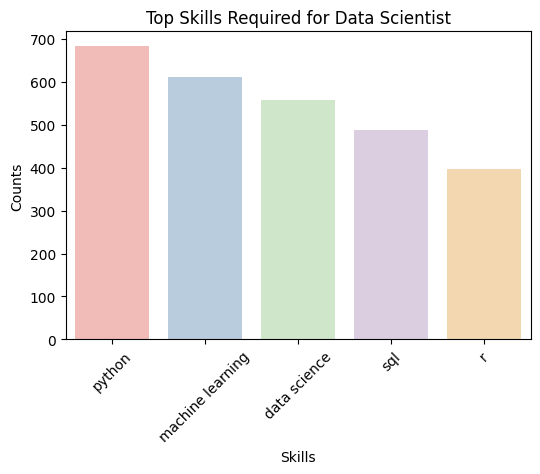

In [75]:
import matplotlib.pyplot as plt  # descriptive analysis
import seaborn as sns

skills = common_skills_required("Data Scientist", 5)

plt.figure(figsize=(6,4))
sns.barplot(x=skills.index, y=skills.values, palette="Pastel1")
plt.title("Top Skills Required for Data Scientist")
plt.xlabel("Skills")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

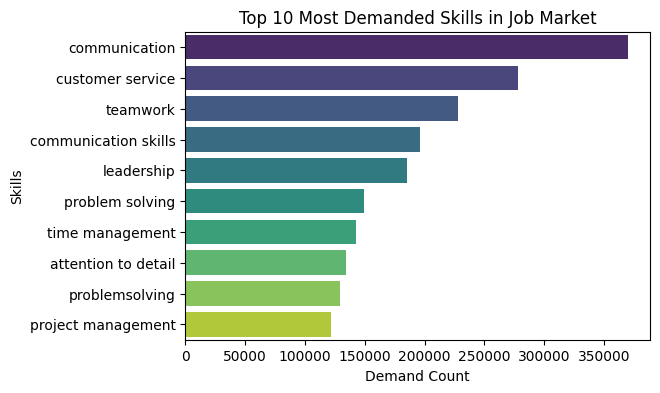

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns


skill_counts = md_clean["job_skills"].value_counts()


top_skills = skill_counts.head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")
plt.title("Top 10 Most Demanded Skills in Job Market")
plt.xlabel("Demand Count")
plt.ylabel("Skills")
plt.show()

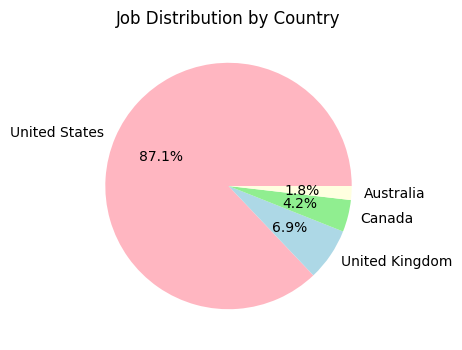

In [86]:
# demonstrating which country provides more job openings
import matplotlib.pyplot as plt

country_count = md_clean["search_country"].value_counts()
country_percent = (country_count / country_count.sum()) * 100
top = country_percent.head(5)


plt.figure(figsize=(6,4))
plt.pie(top.values, labels=top.index, autopct='%1.1f%%',colors=['lightpink', 'lightblue', 'lightgreen', 'lightyellow'])
plt.title("Job Distribution by Country")
plt.show()

In [102]:
# Boxplots are used to visualize data distribution and identify outliers using median values. Used to know where most
# of the data lies 

# Most of the jobs require few skills but few jobs require unrealisticly 300-400 skills for a job
# in the below chart. The "thick line" inside the box is the median. the box is extremely skewed to the right .
# there are so many outliers. Remove them

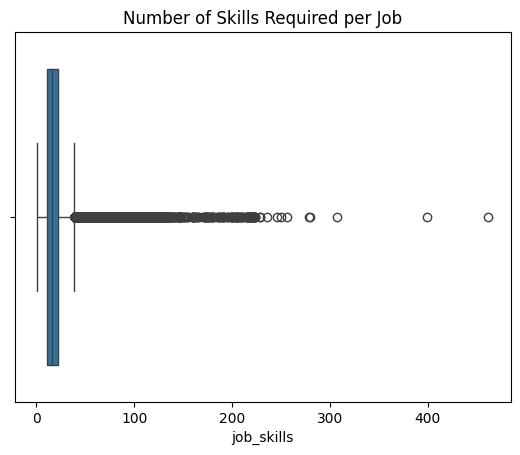

In [101]:
skill_count = md_clean.groupby("job_link")["job_skills"].count()

sns.boxplot(x=skill_count)
plt.title("Number of Skills Required per Job")
plt.show()

In [105]:
# removing outliers using IQR (Inter-Quantile Range)
skill_count = md_clean.groupby("job_link")["job_skills"].count()
Q1 = skill_count.quantile(0.25)
Q3 = skill_count.quantile(0.75)

IQR = Q3 - Q1
lower_quantile= Q1 - 1.5 * IQR
upper_quantile = Q3 + 1.5 * IQR

std_jobs = skill_count[(skill_count >= lower_quantile) & (skill_count <= upper_quantile)].index
md_clean = md_clean[md_clean["job_link"].isin(std_jobs)]

md_clean.nunique()

job_link           1241805
job_skills          156231
company              87671
job_title           546360
job_location         28511
first_seen               6
search_country           4
search_position       1922
job_level                2
job_type                 3
month                    1
dtype: int64

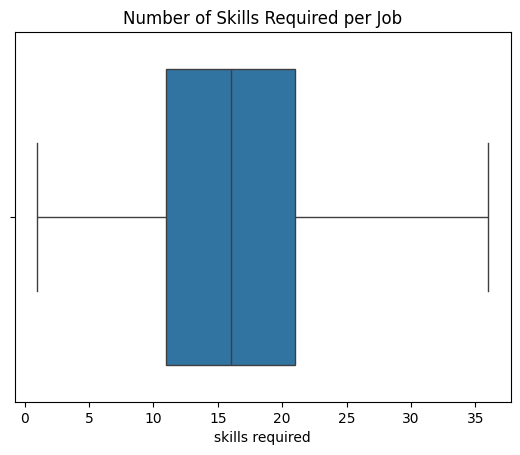

In [106]:
# Visualization after removing outliers
skill_count = md_clean.groupby("job_link")["job_skills"].count()

sns.boxplot(x=skill_count)
plt.title("Number of Skills Required per Job")
plt.xlabel("skills required")
plt.show()